In [1]:
cd drive/MyDrive/InClass_Kaggle/

/content/drive/MyDrive/InClass_Kaggle


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./train.csv', names=["id", "MO", "Neu", "CD3", 'CD8', "CD4", 'NK', 'CD19', 'CD45', 'age', 'sex', 'Mono', 'label'], header=0)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


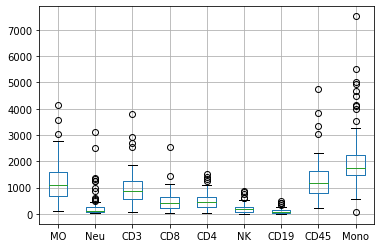

In [4]:
boxplot = df.boxplot(column=["MO", "Neu", "CD3", 'CD8', "CD4", 'NK', 'CD19', 'CD45', 'Mono']) 

In [28]:
df.head()

,id,MO,Neu,CD3,CD8,CD4,NK,CD19,CD45,age,sex,Mono,label
0,0,3556.0,2489.0,265.19,77.53,176.55,0.00,4.20,307.91,52,0,7515.0,1
1,1,1906.0,134.0,1442.61,551.90,876.07,112.10,168.15,1735.48,20,1,1756.0,0
2,2,1586.0,71.0,1332.74,684.20,655.26,244.95,216.52,1820.04,28,1,1311.0,0
3,3,683.0,94.0,419.23,255.80,162.17,72.05,44.68,538.22,55,1,1443.0,0
4,4,1032.0,71.0,1102.72,480.27,625.30,188.78,130.77,1427.97,28,1,1542.0,0


In [5]:
df.dropna(axis=0, how='any', inplace=True)

In [7]:
df['label'].value_counts()

0    57
1    29
Name: label, dtype: int64

In [10]:
train_X = df.iloc[:,1:12]
train_Y = df['label']

In [8]:
from sklearn.model_selection import GridSearchCV

In [11]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators': range(10, 50, 5), 'max_depth': range(2, 15, 1), 'criterion': ['gini', 'entropy']}
RF = RandomForestClassifier()
clf1 = GridSearchCV(RF, parameters, cv=10)
clf1.fit(train_X, train_Y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 15),
                         'n_estimators': range(10, 50, 5)})

In [16]:
clf1.best_score_

0.9416666666666667

In [17]:
clf1.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 30}

In [18]:
clf1.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=30)

In [19]:
df_test = pd.read_csv('test.csv', names=["id", "MO", "Neu", "CD3", 'CD8', "CD4", 'NK', 'CD19', 'CD45', 'age', 'sex', 'Mono'], header=0)
df_test = df_test.iloc[:,1:]

In [27]:
df_test.head()

,MO,Neu,CD3,CD8,CD4,NK,CD19,CD45,age,sex,Mono
0,2843.0,156.0,1358.52,730.78,637.85,127.06,94.82,1588.62,45,1,3256.0
1,437.0,137.0,509.43,268.05,243.07,390.86,98.24,1002.76,51,1,491.0
2,826.0,82.0,1232.22,493.42,744.08,516.28,320.15,2200.58,32,0,1381.0
3,861.0,50.0,1512.86,925.51,590.07,380.25,25.80,1929.10,50,0,1377.0
4,1160.0,157.0,890.42,403.91,489.53,266.92,87.63,1251.52,43,0,1844.0


# **Semi-Supervised Learning**

In [21]:
pseudo_label=clf1.predict(df_test)
new_label = pd.concat([pd.Series(pseudo_label), train_Y])
new_train_set =  pd.concat([df_test, train_X])

parameters = {'n_estimators': range(10, 50, 5), 'max_depth': range(2, 15, 1), 'criterion': ['gini', 'entropy']}
RF = RandomForestClassifier()
model = GridSearchCV(RF, parameters, cv=10)
model.fit(new_train_set, new_label)
final_predict = model.predict(df_test)

In [24]:
df_submission = pd.read_csv('./sample_submission.csv')

In [25]:
df_submission['label'] = final_predict